In [1]:
import numpy as np
import matplotlib.pyplot as plt
import meshplot as mp
import open3d as o3d

In [2]:
def make_circle(centre, radius=1):
  theta = np.linspace(0, 2*np.pi, 100)
  a = radius*np.cos(theta) + centre[0]
  b = radius*np.sin(theta) + centre[1]

  return a,b

# One hit vectors:


In [3]:

atom_radius = 1.7
atom_center = np.array([0,0])

offset = 0.2
probe_radius = 1.4
distance = atom_radius+probe_radius - offset
sample_point = atom_center + np.array([0,distance])

n = 15000
vec = np.random.random([2,n]) - 0.5 #make random directional vectors.
vec /= np.linalg.norm(vec,axis=0) #normalize to length 1
vec *= np.random.uniform(low=0, high=probe_radius, size=[1,n]) #make length UP to the probe radius
vec = vec.T
probe_center = vec + sample_point

In [4]:
#this is a way to sample from the unit sphere with even density inside.
#see: https://math.stackexchange.com/a/87238/762370
r=np.random.randn(2,n)
p=(probe_radius * np.random.uniform(0,1,size=n)**(1/2)) / np.sqrt(np.sum(r**2, 0)) * r
probe_center=p.T+sample_point

In [5]:
ba = sample_point - atom_center
bc = probe_center - sample_point

cosine_angle = np.dot(bc, ba) / (np.linalg.norm(ba) * np.linalg.norm(bc,axis=1))
gamma_angle = np.pi - np.arccos(cosine_angle)
    
a = np.linalg.norm(sample_point - atom_center)
b = np.linalg.norm(probe_center - sample_point, axis=1)
equ = np.sqrt(a**2 + b**2 - 2*a*b*np.cos(gamma_angle)) - (probe_radius+atom_radius)

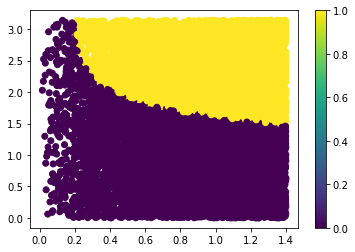

In [6]:
m = equ>0

#plt.scatter(b[m], gamma_angle[m])
#plt.scatter(b, gamma_angle, c=equ)
plt.scatter(b, gamma_angle, c=equ>0)
plt.colorbar()

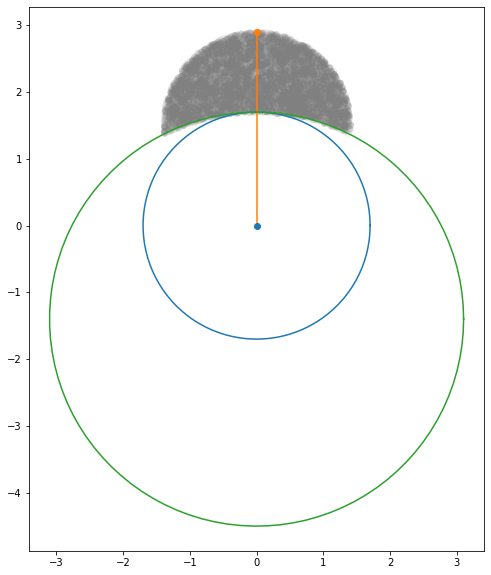

In [7]:
fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

ax.plot(*make_circle([0,0], atom_radius))

#plot the circle:
#ax.plot(*make_circle(probe_center, probe_radius), c='grey', alpha=0.2,zorder=-1)

#plot the center of the probe atom:
#ax.scatter(probe_center[0], probe_center[1], c='grey', alpha=0.1, facecolor='',zorder=-1)

#plot the line from the sample point to the probe center
#ax.plot([sample_point[0], probe_center[0]], [sample_point[1], probe_center[1]], c='grey', alpha=0.2 )
#ax.plot([probe_center[0], probe_center[0]], [probe_center[1], probe_center[1]+probe_radius], c='grey', alpha=0.2 )



ax.scatter(probe_center[m][:,0], probe_center[m][:,1]-(distance-atom_radius)-offset, c='grey', alpha=0.1, facecolor='',zorder=-1)
ax.scatter(sample_point[0], sample_point[1],zorder=10, c='C1')
ax.scatter(atom_center[0], atom_center[1],zorder=10, c='C0')
ax.plot([atom_center[0], sample_point[0]],[atom_center[1], sample_point[1]])


j,k = make_circle([0,0], atom_radius+probe_radius)
ax.plot(j, k-probe_radius)
ax.set_aspect(1)




# 3d:

In [59]:
atom_radius = 3.5
atom_center = np.array([0,0,0])

probe_radius = 1.5
distance = atom_radius+probe_radius -0.5
sample_point = atom_center + np.array([0,0,distance])

n = 50000
vec = np.random.random([3,n]) - 0.5 #make random directional vectors.
vec /= np.linalg.norm(vec,axis=0) #normalize to length 1
vec *= np.random.uniform(low=0, high=probe_radius, size=[1,n]) #make length UP to the probe radius
vec = vec.T
probe_center = vec + sample_point

In [60]:

# #this is a way to sample from the unit sphere with even density inside.
# #see: https://math.stackexchange.com/a/87238/762370
# r=np.random.randn(3,n)
# p=(probe_radius * np.random.uniform(0,1,size=n)**(1/3)) / np.sqrt(np.sum(r**2, 0)) * r
# probe_center=p.T+sample_point

In [61]:
ba = sample_point - atom_center
bc = probe_center - sample_point

cosine_angle = np.dot(bc, ba) / (np.linalg.norm(ba) * np.linalg.norm(bc,axis=-1))
gamma_angle = np.pi - np.arccos(cosine_angle)
    
a = np.linalg.norm(sample_point - atom_center)
b = np.linalg.norm(probe_center - sample_point, axis=-1)
equ = np.sqrt(a**2 + b**2 - 2*a*b*np.cos(gamma_angle)) - (probe_radius+atom_radius)

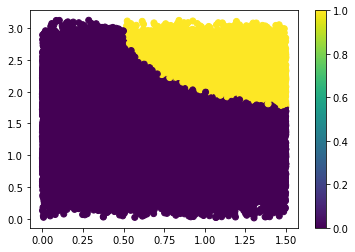

In [62]:
m = equ>0

#plt.scatter(b[m], gamma_angle[m])
#plt.scatter(b, gamma_angle, c=equ)
plt.scatter(b, gamma_angle, c=equ>0)
plt.colorbar()

In [63]:
mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=atom_radius)
mesh_sphere.compute_vertex_normals()

sample_pt_mesh = o3d.geometry.TriangleMesh.create_sphere(radius=0.1)
sample_pt_mesh.compute_vertex_normals()
sample_pt_mesh.vertices = o3d.utility.Vector3dVector(np.array(sample_pt_mesh.vertices) + sample_point)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(probe_center[m])
# probes = list()
# for pt in probe_center[m]:
#     msh = o3d.geometry.TriangleMesh.create_sphere(radius=probe_radius)
#     msh.compute_vertex_normals()
#     msh.vertices = o3d.utility.Vector3dVector(np.array(msh.vertices) + pt)
#     probes.append(msh)


In [64]:
o3d.visualization.draw_geometries([pcd, mesh_sphere, sample_pt_mesh] )
#o3d.visualization.draw_geometries([mesh_sphere, sample_pt_mesh] + probes )

# Sympy stuff:

In [472]:
from sympy import *
b= Symbol('b')
g= Symbol('g')
pr = 1.4
ar = 1.7
c= ar+pr
#c = Symbol('c')
#a = 7
a = Symbol('a')

In [475]:
result = solve(a**2 +  - ar + b**2-2*b*2*cos(g), c)


[]

In [449]:
result = solve(a**2 +  - ar + b**2-2*b*2*cos(g), b)
result

[-2.0*sqrt(-0.25*a**2 + cos(g)**2 + 0.425) + 2.0*cos(g),
 2.0*sqrt(-0.25*a**2 + cos(g)**2 + 0.425) + 2.0*cos(g)]

In [478]:
n = 15
colors = plt.cm.jet(np.linspace(0, 1.1,n))

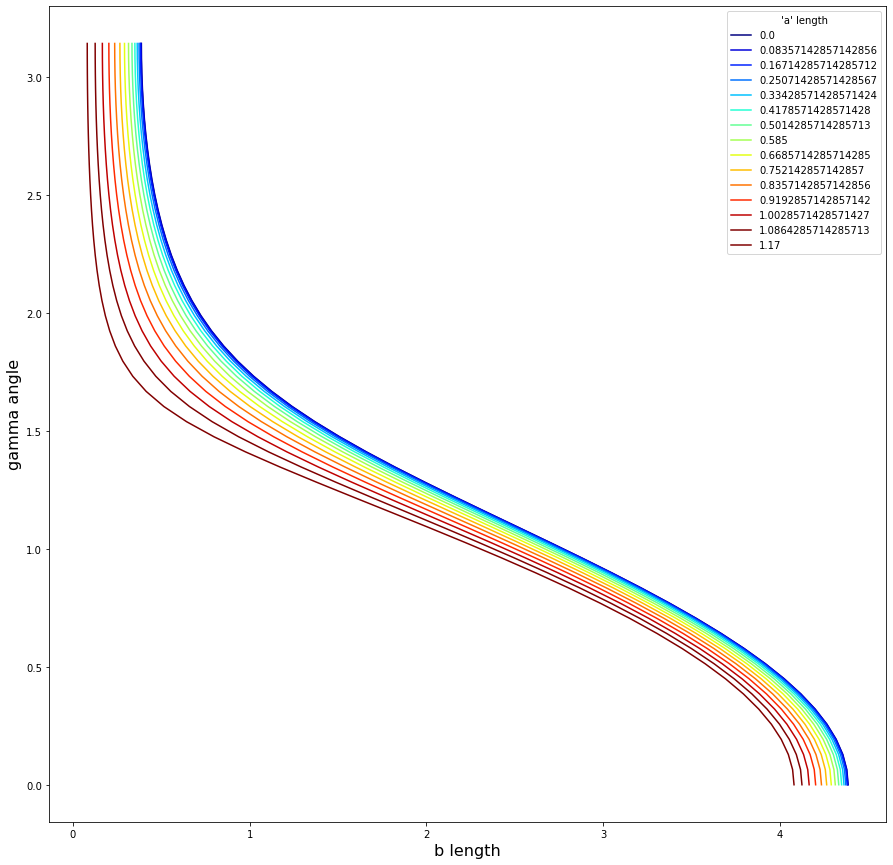

In [489]:
plt.figure(figsize=(15,15))
g = np.linspace(0, np.pi)
for count,a in enumerate(np.linspace(0, 1.17, n)):
    bvals = 2 * np.sqrt(-0.25*a**2 + np.cos(g)**2 + 0.425) + 2*np.cos(g)
    plt.plot(bvals, g, c=colors[count], label=a)
    
plt.xlabel('b length',fontsize=16)
plt.ylabel('gamma angle', fontsize=16)
plt.legend()
plt.legend(title="'a' length",fancybox=True)